<a href="https://colab.research.google.com/github/Izyakowich/TMO/blob/main/TMO_RK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# РК №2 Вариант 3 Линейная/логистическая регрессия Случайный лес

### Саркисян С.З. ИУ5-61Б

Задание. Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data = pd.read_csv('states_all.csv')

In [34]:
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [35]:
data.dtypes

PRIMARY_KEY                      object
STATE                            object
YEAR                              int64
ENROLL                          float64
TOTAL_REVENUE                   float64
FEDERAL_REVENUE                 float64
STATE_REVENUE                   float64
LOCAL_REVENUE                   float64
TOTAL_EXPENDITURE               float64
INSTRUCTION_EXPENDITURE         float64
SUPPORT_SERVICES_EXPENDITURE    float64
OTHER_EXPENDITURE               float64
CAPITAL_OUTLAY_EXPENDITURE      float64
GRADES_PK_G                     float64
GRADES_KG_G                     float64
GRADES_4_G                      float64
GRADES_8_G                      float64
GRADES_12_G                     float64
GRADES_1_8_G                    float64
GRADES_9_12_G                   float64
GRADES_ALL_G                    float64
AVG_MATH_4_SCORE                float64
AVG_MATH_8_SCORE                float64
AVG_READING_4_SCORE             float64
AVG_READING_8_SCORE             float64


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [37]:
data.isnull().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

Удалим строки с пустым значением 'ENROLL' и столбцы с хотя бы 1 пустым значением.

In [38]:
data.dropna(subset=['ENROLL'], inplace=True)
data.dropna(axis='columns', inplace=True)
data = data.drop(['PRIMARY_KEY', 'STATE', 'GRADES_KG_G'], axis=1)
data.isnull().sum()

YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_ALL_G                    0
dtype: int64

In [39]:
data

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_ALL_G
51,1993,727716.0,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,794146.0,237222.0,204207.0,57497.0,60004.0,39900.0,734288.0
52,1993,121156.0,1191398.0,176150.0,775829.0,239419.0,1126398.0,494917.0,433788.0,36291.0,135791.0,10156.0,9160.0,6975.0,125948.0
53,1993,676297.0,3427976.0,318465.0,1415407.0,1694104.0,3623946.0,1578889.0,1000914.0,164083.0,680139.0,57701.0,53500.0,37614.0,709453.0
54,1993,311432.0,1346909.0,128196.0,771079.0,447634.0,1376067.0,782791.0,386526.0,68617.0,97824.0,34255.0,36471.0,27169.0,444271.0
55,1993,5129788.0,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,8914559.0,1608514.0,1944760.0,420233.0,380223.0,277271.0,5327231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,2016,1283493.0,16259274.0,1058146.0,6297587.0,8903541.0,16497520.0,8944614.0,5164699.0,643506.0,1161323.0,99258.0,95234.0,90500.0,1287026.0
1271,2016,1083973.0,14964364.0,1097684.0,9211201.0,4655479.0,15253296.0,7087365.0,4904575.0,577606.0,2204059.0,86114.0,81039.0,90645.0,1101711.0
1272,2016,276764.0,3391579.0,358068.0,1863062.0,1170449.0,3366566.0,1804235.0,1127255.0,236487.0,181392.0,20324.0,19931.0,18155.0,273855.0
1273,2016,857736.0,11697466.0,782610.0,5986763.0,4928093.0,11787535.0,5760418.0,3691439.0,508013.0,1082849.0,62408.0,61432.0,66303.0,864432.0


<Axes: >

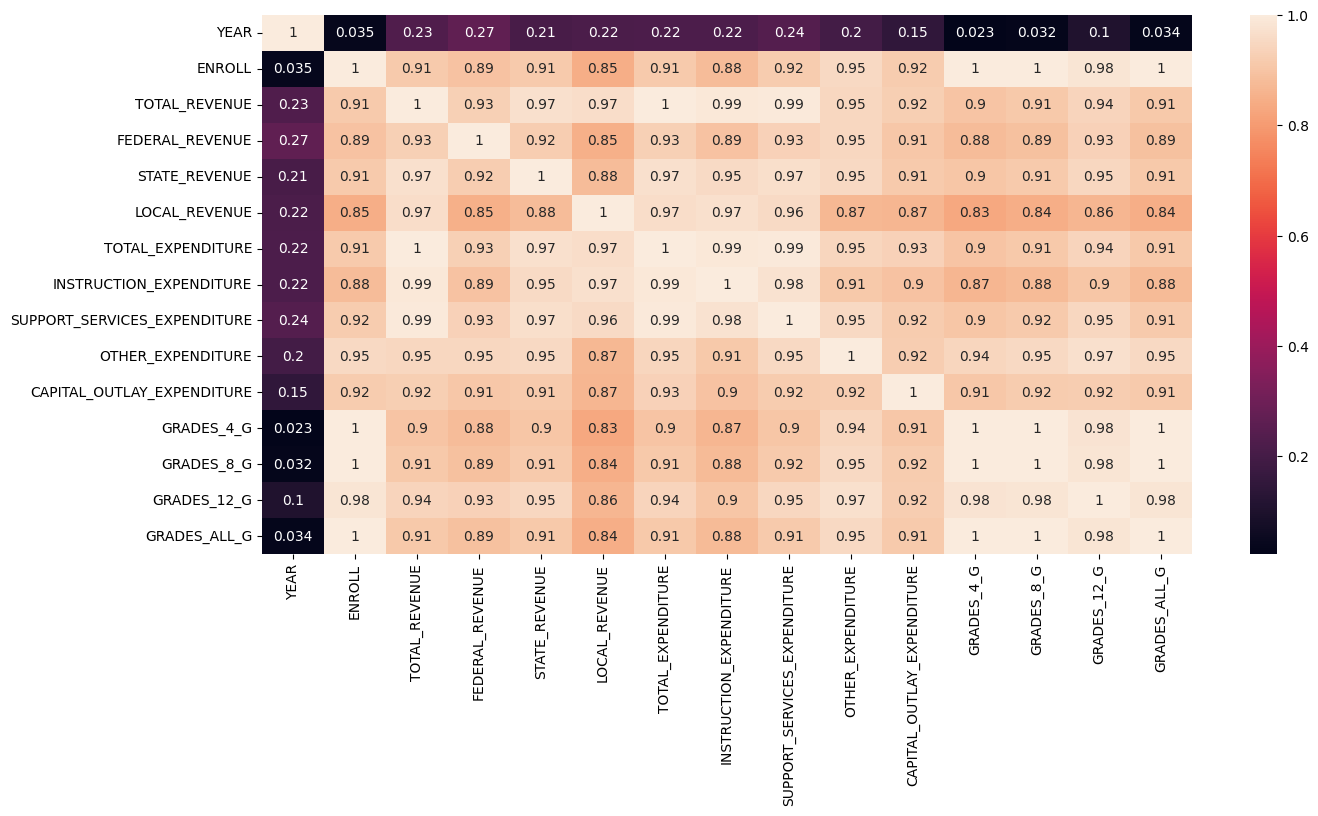

In [40]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True)

## Линейная регрессия

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = data.drop(columns=['ENROLL']) 
y = data['ENROLL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f"Модель линейной регрессии:")
print(f"Среднеквадратичная ошибка (MSE) = {mse}")
print(f"Средняя абсолютная ошибка (MAE) = {mae}")
print(f"Коэффициент детерминации (R²) = {r2}")

Модель линейной регрессии:
Среднеквадратичная ошибка (MSE) = 2095356176.718439
Средняя абсолютная ошибка (MAE) = 22518.308373642143
Коэффициент детерминации (R²) = 0.9984282027634138


## Случайный лес

In [31]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"Модель случайного леса:")
print(f"Среднеквадратичная ошибка (MSE) = {mse}")
print(f"Средняя абсолютная ошибка (MAE) = {mae}")
print(f"Коэффициент детерминации (R²) = {r2}")

Модель случайного леса:
Среднеквадратичная ошибка (MSE) = 2558294227.7697134
Средняя абсолютная ошибка (MAE) = 17318.974
Коэффициент детерминации (R²) = 0.9980809373402661


Исходя из этих результатов, можно сделать вывод, что модель случайного леса предпочтительнее для данной задачи, тк MSE и MAE у нее меньше, а коэффициент детерминации больше.